In [38]:
!pip install -U textblob
!pip install tensorflow-hub
!pip install fasttext

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Load Data

In [40]:
df_train = pd.read_csv("Webpages_Classification_train_data.csv")
df_test = pd.read_csv("Webpages_Classification_test_data.csv")

#Ensuring correct sequence of columns 
df_train = df_train[['url','ip_add','geo_loc','url_len','js_len','js_obf_len','tld','who_is','https','content','label']]
df_test = df_test[['url','ip_add','geo_loc','url_len','js_len','js_obf_len','tld','who_is','https','content','label']]

### Split Data 

In [41]:
df_test
#df_train

# Separate "good" and "bad" samples in df_train
good_samples = df_train[df_train['label'] == 'good']
bad_samples = df_train[df_train['label'] == 'bad']

# Calculate the number of samples needed for each class
num_samples = min(len(good_samples), len(bad_samples))

# Sample the same number of "good" and "bad" samples
good_samples_reduced = good_samples.sample(n=num_samples, random_state=42)
bad_samples_reduced = bad_samples.sample(n=num_samples, random_state=42)

# Concatenate the reduced samples
df_train_reduced = pd.concat([good_samples_reduced, bad_samples_reduced])

# Shuffle the DataFrame to mix the samples
df_train_reduced = df_train_reduced.sample(frac=1, random_state=42)

# Now df_train_reduced contains the same number of "good" and "bad" samples
# Do the same for df_test
df_test_reduced = pd.concat([good_samples.sample(n=num_samples, random_state=42),
                             bad_samples.sample(n=num_samples, random_state=42)])
df_test_reduced = df_test_reduced.sample(frac=1, random_state=42)

# Ensure consistency of columns
df_test_reduced = df_test_reduced[df_train_reduced.columns]

# Shuffle the DataFrame to mix the samples
df_test_reduced = df_test_reduced.sample(frac=1, random_state=42)

#df_train_reduced = df_train
#df_test_reduced = df_test

In [1]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel("Class Labels")
ax1.set_ylabel("Frequency") 
ax1.title.set_text('Bar Plot: Malicious & Benign Webpages')
labels = df_train_reduced['label'].value_counts()

print(labels)
w = (list(labels.index), list(labels.values))
ax1.tick_params(axis='both', which='major')
bar = ax1.bar(w[0], w[1], color=['green','red'], edgecolor='black', linewidth=1)



NameError: name 'plt' is not defined

## Attribute 'Content' 
  Add Sentiment Polarity Analysis of Web Content:

In [43]:
from textblob import TextBlob
import plotly.graph_objects as go

df_train_reduced['polarity'] = df_train_reduced['content'].map(lambda content: TextBlob(content).sentiment.polarity)
df_test_reduced['polarity'] = df_test_reduced['content'].map(lambda content: TextBlob(content).sentiment.polarity)

# GRAPH
df_trial_good = df_train_reduced.loc[df_train['label']=='good']
df_trial_bad = df_train_reduced.loc[df_train['label']=='bad']
fig = go.Figure()
t1= go.Histogram(x=df_trial_good['polarity'],name='Benign Webpages',marker_color='green')
t2= go.Histogram(x=df_trial_bad['polarity'],name='Malicious Webpages',marker_color='red')
fig.add_trace(t1)
fig.add_trace(t2)
fig.update_layout(title="Sentiment Analysis of Web Content",xaxis_title="Sentiment Polarity Score",yaxis_title="Count")
fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.75)
# GRAPH

df_train_reduced


,url,ip_add,geo_loc,url_len,js_len,js_obf_len,tld,who_is,https,content,label,polarity
1007099,http://groups.yahoo.com/group/bdsm-vlaanderen/,222.234.33.157,South Korea,46,828.9,737.721,com,incomplete,no,kill shoot negro pindick trots shit mothafucke...,bad,0.000704
917158,http://www.najical.com/blink182/,180.245.175.246,Indonesia,32,72.5,0.000,com,complete,yes,Into bermuda criticised in france between the ...,good,0.060909
421539,http://padihamparish.org/,63.217.235.1,United States,25,81.5,0.000,org,incomplete,yes,"Turkey, arabia, in forms of and the mixed biol...",good,-0.045370
551597,http://www.insenses.org/virtualboxon/,214.217.119.112,United States,37,0.0,0.000,org,complete,no,cocktease fatfuck taff swallow gyppy lolita fu...,bad,-0.089583
834317,http://www.locusarts.org,169.225.229.223,United States,24,95.0,0.000,org,complete,yes,Election saw for up to 56. Completed on cathol...,good,0.003704
...,...,...,...,...,...,...,...,...,...,...,...,...
514605,http://www.maximumhardcoremovies.com/hardcore_...,96.208.197.23,United States,67,777.6,520.992,com,incomplete,no,poo dirty shithouse fagging nutfucker panti so...,bad,-0.024538
1059976,http://www.dawnsplace.com/,103.98.55.171,Singapore,26,672.3,470.610,com,incomplete,no,nigger cacker virginbreaker upthebutt pommy di...,bad,-0.022802
820506,http://adultlinkpost.com/,49.51.76.213,United States,25,638.1,325.431,com,incomplete,no,kaffre crack buttmunch jiggy butt-fuck rape bi...,bad,-0.034337
762225,http://global-forum.org,106.28.187.211,China,23,92.5,0.000,org,complete,yes,"Developed through include classical mechanics,...",good,0.029232


Length of Web Content Analysis

In [44]:
df_train_reduced['content_len'] = df_train_reduced['content'].astype(str).apply(len)
df_test_reduced['content_len'] = df_test_reduced['content'].astype(str).apply(len)

#df_trial : good and bad
df_trial_good = df_train_reduced.loc[df_train['label']=='good']
df_trial_bad = df_train_reduced.loc[df_train['label']=='bad']
#Plotting it on Histograms
fig = go.Figure()
t1= go.Histogram(x=df_trial_good['content_len'],name='Benign Webpages',marker_color='green')
t2= go.Histogram(x=df_trial_bad['content_len'],name='Malicious Webpages',marker_color='red')
fig.add_trace(t1)
fig.add_trace(t2)
fig.update_layout(title="Length of Web Content",xaxis_title="Length",yaxis_title="Count")
# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

### Clean Text function

In [45]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download stopwords if not already downloaded
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove non-alphanumeric characters, extra whitespaces, and newline characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text.replace('\n', ''))
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove stopwords and lemmatize tokens
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    
    # Join tokens back into a string
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text


[nltk_data] Downloading package stopwords to /home/tomas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/tomas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/tomas/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Create the training file


In [46]:
df_train_reduced
df_train
        
with open('content_data.txt', 'w', encoding='utf-8') as f:
    for index, row in df_train_reduced.iterrows():
        label = 0 if row['label'] == 'good' else 1
        preprocessed_content = preprocess_text(row['content'])
        f.write(f"__label__{label} {preprocessed_content}\n")
   

### Train model FastText

In [47]:
import fasttext

model = fasttext.train_supervised('content_data.txt', lr=0.1, dim=100, ws=5, epoch=5)


Read 24M words
Number of words:  53043
Number of labels: 2
Progress: 100.0% words/sec/thread: 2383465 lr:  0.000000 avg.loss:  0.151213 ETA:   0h 0m 0s


In [48]:
df_train_reduced['content_vector'] = df_train_reduced['content'].apply(lambda x: model.get_sentence_vector(preprocess_text(x)))
df_test_reduced['content_vector'] = df_test_reduced['content'].apply(lambda x: model.get_sentence_vector(preprocess_text(x)))

df_train_reduced

# df_train['content_vector'] = df_train['content'].apply(lambda x: model.get_sentence_vector(preprocess_text(x)))

# df_train



,url,ip_add,geo_loc,url_len,js_len,js_obf_len,tld,who_is,https,content,label,polarity,content_len,content_vector
1007099,http://groups.yahoo.com/group/bdsm-vlaanderen/,222.234.33.157,South Korea,46,828.9,737.721,com,incomplete,no,kill shoot negro pindick trots shit mothafucke...,bad,0.000704,9633,"[-0.0027929265, 0.00046930945, 0.005890127, 0...."
917158,http://www.najical.com/blink182/,180.245.175.246,Indonesia,32,72.5,0.000,com,complete,yes,Into bermuda criticised in france between the ...,good,0.060909,1217,"[0.008163303, 0.00040420753, -0.019957475, -0...."
421539,http://padihamparish.org/,63.217.235.1,United States,25,81.5,0.000,org,incomplete,yes,"Turkey, arabia, in forms of and the mixed biol...",good,-0.045370,1215,"[0.007500764, -0.0010306635, -0.017941443, -0...."
551597,http://www.insenses.org/virtualboxon/,214.217.119.112,United States,37,0.0,0.000,org,complete,no,cocktease fatfuck taff swallow gyppy lolita fu...,bad,-0.089583,1619,"[-0.0006922978, 0.0004384272, 0.0014229586, 0...."
834317,http://www.locusarts.org,169.225.229.223,United States,24,95.0,0.000,org,complete,yes,Election saw for up to 56. Completed on cathol...,good,0.003704,866,"[0.0057102004, 0.00059090665, -0.016470958, -0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514605,http://www.maximumhardcoremovies.com/hardcore_...,96.208.197.23,United States,67,777.6,520.992,com,incomplete,no,poo dirty shithouse fagging nutfucker panti so...,bad,-0.024538,7936,"[-0.0027208743, 0.00045104153, 0.0052145887, 0..."
1059976,http://www.dawnsplace.com/,103.98.55.171,Singapore,26,672.3,470.610,com,incomplete,no,nigger cacker virginbreaker upthebutt pommy di...,bad,-0.022802,8378,"[-0.0027268329, 0.00079824316, 0.006309061, 0...."
820506,http://adultlinkpost.com/,49.51.76.213,United States,25,638.1,325.431,com,incomplete,no,kaffre crack buttmunch jiggy butt-fuck rape bi...,bad,-0.034337,7933,"[-0.002315771, 0.0007060626, 0.00542124, 0.008..."
762225,http://global-forum.org,106.28.187.211,China,23,92.5,0.000,org,complete,yes,"Developed through include classical mechanics,...",good,0.029232,1687,"[0.00842425, 0.00024242052, -0.019312806, -0.0..."


### PCA graph

In [49]:
from sklearn.decomposition import PCA

# X = df_train_reduced['content_vector'].tolist()
X = df_train_reduced['content_vector'].tolist()


pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# # Convert the PCA-reduced data back into a DataFrame for easier manipulation
# pca_df = pd.DataFrame(X_pca, columns=['pca-one', 'pca-two', 'pca-three'])

# # Assuming you have a 'label' column in your original DataFrame to distinguish between 'good' and 'bad'
# pca_df['label'] = df_train_reduced['label']

X_pca

array([[-1.57537777e-01, -5.08184803e-04, -2.45989607e-04],
       [ 1.65222290e-01,  8.67156841e-04, -4.02328080e-04],
       [ 1.54419538e-01,  3.64717362e-04, -2.78894568e-04],
       ...,
       [-1.47184133e-01, -1.29858847e-03, -5.26000421e-04],
       [ 1.74137166e-01,  2.26824820e-04, -1.13609385e-04],
       [ 1.62475172e-01, -4.19043055e-04, -1.94861820e-04]])

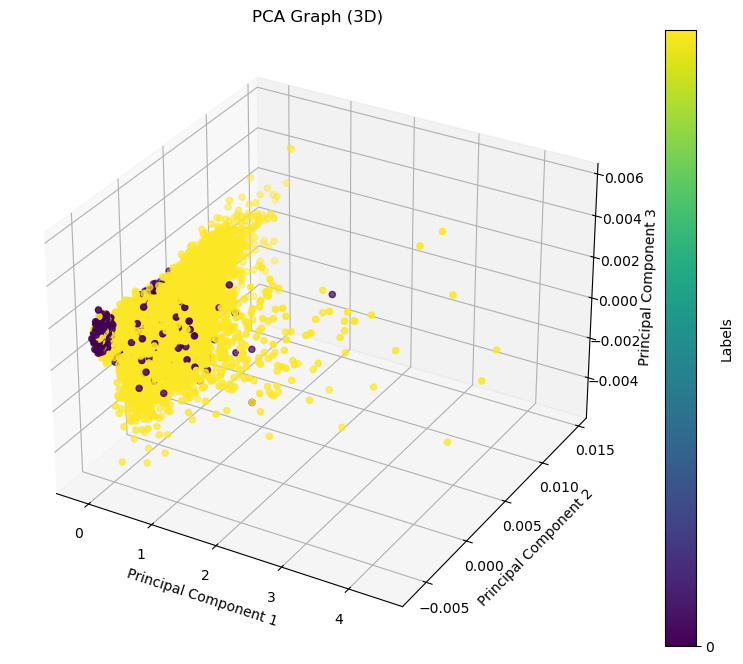

In [50]:
# # Plot PCA graph
# plt.figure(figsize=(8, 6))
# # plt.scatter(X_pca[:, 0], X_pca[:, 1], c=pd.factorize(df_train_reduced['label'])[0], cmap='viridis')
# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=pd.factorize(df_train['label'])[0], cmap='viridis')

# plt.title('PCA Graph')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.colorbar(label='Labels')
# plt.grid(True)
# plt.show()

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Define unique colors for each label
unique_labels = pd.factorize(df_train_reduced['label'])[0]
colors = plt.cm.viridis(unique_labels.astype(float) / len(unique_labels))

# Scatter plot
sc = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=unique_labels, cmap='viridis')

# Labeling axes
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Title
plt.title('PCA Graph (3D)')

# Add color bar legend
cbar = plt.colorbar(sc, ticks=np.linspace(0, len(unique_labels)-1, num=10))  # Adjust the number of ticks as needed
cbar.set_label('Labels')

# Displaying the plot
plt.show()

## Logistic Regression using the attributes: 'url_len', 'js_len', 'js_obf_len' 'content_len' 'polarity' + 100 vector features


#### With the 100 extra features the logistic regression model's coefficients did not converge within the maximum number of iterations specified (max_iter). 

In [51]:
def featureNormalization(X):
    """
    Take in numpy array of X values and return normalize X values,
    the mean and standard deviation of each feature
    """
    mean= np.mean(X, axis=0)
    
    std= np.std(X, axis=0)
    
    X_norm = (X - mean) / std
    
    return X_norm , mean , std




In [52]:
from sklearn.linear_model import LogisticRegression

data_n = df_train_reduced.iloc[:,[3,4,5,11,12 ]]
vector = df_train_reduced.iloc[:, 13]

# X = data_n.values

# #adicionar 100 features do fasttext
concat_data = []
for i in range(len(vector.values)):
    c_arr = np.concatenate((data_n.values[i], vector.values[i]))
    concat_data.append(c_arr)

X = np.array(concat_data)

# #y = df_train.iloc[:, -1]
y = df_train_reduced.iloc[:, 10]

y = y.replace({'good': 0, 'bad': 1})

Xnorm, X_mean, X_std = featureNormalization(X)

logitN = LogisticRegression(solver='saga', max_iter=10000)
logitN.fit(Xnorm,y)
print('Accuracy of log reg classifier')
print(logitN.score(Xnorm, y))

data_n

df_train_reduced

Accuracy of log reg classifier
0.973048838659964


,url,ip_add,geo_loc,url_len,js_len,js_obf_len,tld,who_is,https,content,label,polarity,content_len,content_vector
1007099,http://groups.yahoo.com/group/bdsm-vlaanderen/,222.234.33.157,South Korea,46,828.9,737.721,com,incomplete,no,kill shoot negro pindick trots shit mothafucke...,bad,0.000704,9633,"[-0.0027929265, 0.00046930945, 0.005890127, 0...."
917158,http://www.najical.com/blink182/,180.245.175.246,Indonesia,32,72.5,0.000,com,complete,yes,Into bermuda criticised in france between the ...,good,0.060909,1217,"[0.008163303, 0.00040420753, -0.019957475, -0...."
421539,http://padihamparish.org/,63.217.235.1,United States,25,81.5,0.000,org,incomplete,yes,"Turkey, arabia, in forms of and the mixed biol...",good,-0.045370,1215,"[0.007500764, -0.0010306635, -0.017941443, -0...."
551597,http://www.insenses.org/virtualboxon/,214.217.119.112,United States,37,0.0,0.000,org,complete,no,cocktease fatfuck taff swallow gyppy lolita fu...,bad,-0.089583,1619,"[-0.0006922978, 0.0004384272, 0.0014229586, 0...."
834317,http://www.locusarts.org,169.225.229.223,United States,24,95.0,0.000,org,complete,yes,Election saw for up to 56. Completed on cathol...,good,0.003704,866,"[0.0057102004, 0.00059090665, -0.016470958, -0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514605,http://www.maximumhardcoremovies.com/hardcore_...,96.208.197.23,United States,67,777.6,520.992,com,incomplete,no,poo dirty shithouse fagging nutfucker panti so...,bad,-0.024538,7936,"[-0.0027208743, 0.00045104153, 0.0052145887, 0..."
1059976,http://www.dawnsplace.com/,103.98.55.171,Singapore,26,672.3,470.610,com,incomplete,no,nigger cacker virginbreaker upthebutt pommy di...,bad,-0.022802,8378,"[-0.0027268329, 0.00079824316, 0.006309061, 0...."
820506,http://adultlinkpost.com/,49.51.76.213,United States,25,638.1,325.431,com,incomplete,no,kaffre crack buttmunch jiggy butt-fuck rape bi...,bad,-0.034337,7933,"[-0.002315771, 0.0007060626, 0.00542124, 0.008..."
762225,http://global-forum.org,106.28.187.211,China,23,92.5,0.000,org,complete,yes,"Developed through include classical mechanics,...",good,0.029232,1687,"[0.00842425, 0.00024242052, -0.019312806, -0.0..."


## Test prediction

In [53]:
X_test = df_test_reduced.iloc[:, [3,4,5,11,12]]
X_vector = df_test_reduced.iloc[:, 13]

concat_data_pred = []
for i in range(len(X_vector.values)):
    c_arr = np.concatenate((X_test.values[i], X_vector.values[i]))
    concat_data_pred.append(c_arr)

X_test_conc = np.array(concat_data_pred)
# X_test = X_test.values
 

Xnorm, X_mean, X_std = featureNormalization(X)
# X_test_norm, X_test_mean, X_test_std  = featureNormalization(X_test)
X_test_norm, X_test_mean, X_test_std  = featureNormalization(X_test_conc)


predictions = logitN.predict(X_test_norm)

predictions


array([0, 1, 1, ..., 1, 1, 1])

### Predictions Vs Real

In [54]:
from sklearn.metrics import classification_report, accuracy_score

y_test = df_test_reduced.iloc[:, 10]

y_test = y_test.replace({'good': 0, 'bad': 1})

y_test

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Generate a classification report
report = classification_report(y_test, predictions)
print(report)

Accuracy: 0.973048838659964
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     27253
           1       0.97      0.98      0.97     27253

    accuracy                           0.97     54506
   macro avg       0.97      0.97      0.97     54506
weighted avg       0.97      0.97      0.97     54506



        benign  malign
benign   26427     826
malign     643   26610
54506


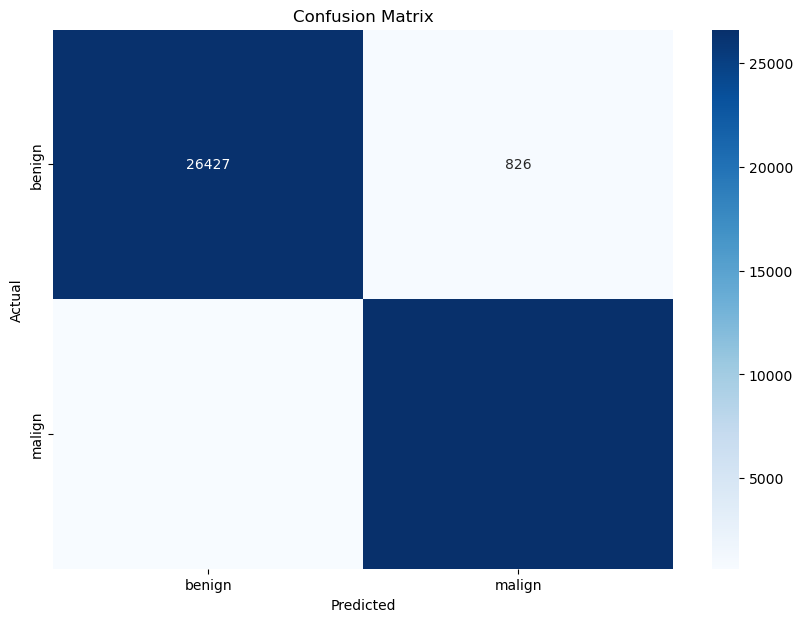

In [55]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns



# Assuming 'predictions' is your model's predictions
# Calculate the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Print the confusion matrix to verify values
# print("Confusion Matrix:\n", cm)

df_cm = pd.DataFrame(cm, index=['benign', 'malign'], columns=['benign', 'malign'])
print(df_cm)
print(len(df_test_reduced))
# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')


plt.show()

## Neural Network Aproach

#### 105 features

In [75]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

X_trainN = np.array(concat_data)
X_testN = np.array(concat_data_pred)
y_trainN = np.array(y)
y_testN = np.array(y_test)

# # Encoding labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_trainN)
y_test_encoded = label_encoder.transform(y_testN)
# Define the model
modelNN = Sequential()
modelNN.add(Dense(64, activation='relu', input_shape=(X_trainN.shape[1],)))
modelNN.add(Dense(32, activation='relu'))
modelNN.add(Dense(1, activation='sigmoid'))

# Compile the model
modelNN.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
modelNN.fit(X_trainN, y_train_encoded, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model
loss, accuracy = modelNN.evaluate(X_testN, y_test_encoded)
print(f'Test accuracy: {accuracy}')


Epoch 1/10


/home/tomas/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:85: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1533/1533 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9169 - loss: 0.5328 - val_accuracy: 0.9686 - val_loss: 0.1881
Epoch 2/10
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 1s 799us/step - accuracy: 0.9480 - loss: 0.3306 - val_accuracy: 0.9710 - val_loss: 0.1213
Epoch 3/10
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 1s 881us/step - accuracy: 0.9452 - loss: 0.3513 - val_accuracy: 0.8683 - val_loss: 0.5324
Epoch 4/10
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 1s 809us/step - accuracy: 0.9695 - loss: 0.1392 - val_accuracy: 0.9694 - val_loss: 0.1961
Epoch 5/10
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 1s 886us/step - accuracy: 0.9772 - loss: 0.0989 - val_accuracy: 0.9886 - val_loss: 0.0468
Epoch 6/10
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 1s 806us/step - accuracy: 0.9812 - loss: 0.0805 - val_accuracy: 0.9646 - val_loss: 0.0985
Epoch 7/10
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 1s 823us/step - accuracy: 0.9852 - loss: 0.0623 - val_accuracy: 0.9936 - val_loss: 0.0326
Epoch 8/10
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 1s 882us/step - accuracy: 0.9886 - loss: 0.0433

1704/1704 ━━━━━━━━━━━━━━━━━━━━ 1s 607us/step
Confusion Matrix:
 [[27177    76]
 [  340 26913]]
54506


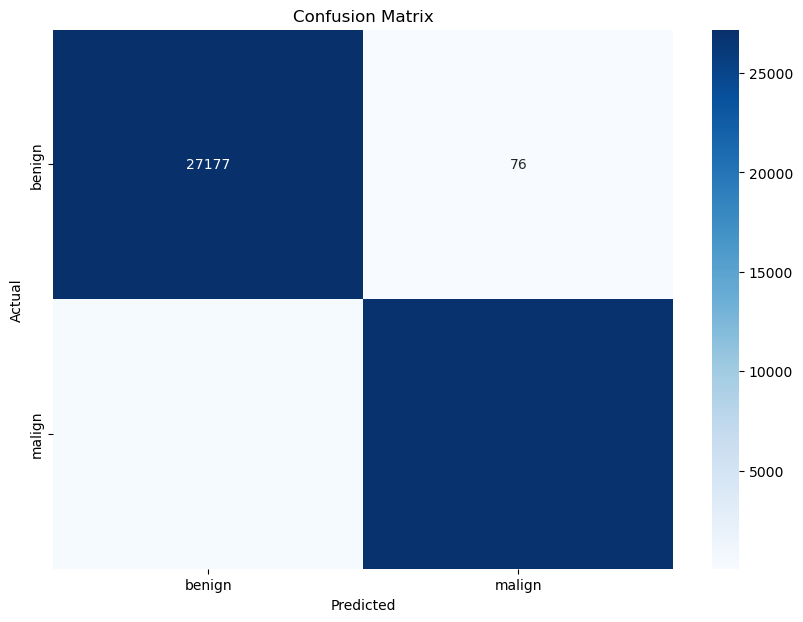

In [78]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming 'predictions' is your model's predictions
# Calculate the confusion matrix
y_pred_prob = modelNN.predict(X_testN)

# Convert probabilities to class predictions
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate the confusion matrix
cmN = confusion_matrix(y_test_encoded, y_pred)
# Print the confusion matrix to verify values
print("Confusion Matrix:\n", cmN)
print(sum(sum(cmN)))
# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cmN, annot=True, fmt='d', cmap='Blues', xticklabels=['benign', 'malign'], yticklabels=['benign', 'malign'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


#### 5 features (without content vector)

In [84]:
X_train5N = np.array(data_n)
X_test5N = np.array(X_test)
y_train5N = np.array(y)
y_test5N = np.array(y_test)
print(X_train5N.shape)
# # Encoding labels
label_encoder = LabelEncoder()
y_train5_encoded = label_encoder.fit_transform(y_train5N)
y_test5_encoded = label_encoder.transform(y_test5N)
# Define the model
modelNN5 = Sequential()
modelNN5.add(Dense(64, activation='relu', input_shape=(X_train5N.shape[1],)))
modelNN5.add(Dense(32, activation='relu'))
modelNN5.add(Dense(1, activation='sigmoid'))

# Compile the model
modelNN5.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
modelNN5.fit(X_train5N, y_train5_encoded, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model
loss5, accuracy5 = modelNN5.evaluate(X_test5N, y_test5_encoded)
print(f'Test accuracy: {accuracy5}')

(54506, 5)
Epoch 1/10


/home/tomas/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:85: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1533/1533 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8714 - loss: 5.0099 - val_accuracy: 0.9499 - val_loss: 0.9824
Epoch 2/10
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 2s 994us/step - accuracy: 0.9435 - loss: 0.5157 - val_accuracy: 0.8655 - val_loss: 0.9517
Epoch 3/10
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 1s 960us/step - accuracy: 0.9473 - loss: 0.5589 - val_accuracy: 0.9530 - val_loss: 0.2652
Epoch 4/10
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 2s 972us/step - accuracy: 0.9628 - loss: 0.3482 - val_accuracy: 0.9839 - val_loss: 0.0954
Epoch 5/10
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 2s 978us/step - accuracy: 0.9628 - loss: 0.3576 - val_accuracy: 0.9820 - val_loss: 0.1598
Epoch 6/10
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 1s 887us/step - accuracy: 0.9696 - loss: 0.2856 - val_accuracy: 0.8877 - val_loss: 0.9994
Epoch 7/10
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9750 - loss: 0.2246 - val_accuracy: 0.9758 - val_loss: 0.2802
Epoch 8/10
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 1s 916us/step - accuracy: 0.9766 - loss: 0.1792 -

1704/1704 ━━━━━━━━━━━━━━━━━━━━ 1s 539us/step
Confusion Matrix:
 [[24369  2884]
 [   83 27170]]
54506


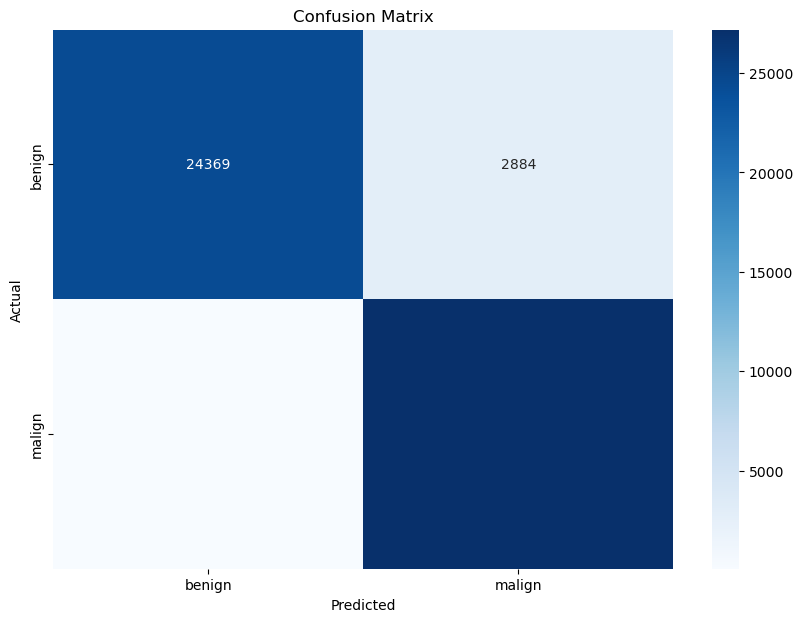

In [86]:

y_pred_prob5 = modelNN5.predict(X_test5N)

# Convert probabilities to class predictions
y_pred5 = (y_pred_prob5 > 0.5).astype(int)

# Calculate the confusion matrix
cmN5 = confusion_matrix(y_test5_encoded, y_pred5)
# Print the confusion matrix to verify values
print("Confusion Matrix:\n", cmN5)
print(sum(sum(cmN5)))
# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cmN5, annot=True, fmt='d', cmap='Blues', xticklabels=['benign', 'malign'], yticklabels=['benign', 'malign'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## Gradient Boosting classifier

In [88]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Create a Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the classifier
gb_classifier.fit(np.array(concat_data), y_train_encoded)

# Make predictions on the test set
y_pred_gb = gb_classifier.predict(np.array(concat_data_pred))

# Calculate accuracy
accuracy_gb = accuracy_score(y_test_encoded, y_pred_gb)
print(f'Test accuracy: {accuracy_gb}')


Test accuracy: 0.9982570726158588


## Random Forest classifier

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(np.array(concat_data), y_train_encoded)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(np.array(concat_data_pred))

# Calculate accuracy
accuracy_rf = accuracy_score(y_test_encoded, y_pred_rf)
print(f'Test accuracy: {accuracy_rf}')


Test accuracy: 1.0


##  K-Nearest Neighbors classifier

In [91]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create a KNN classifier with k=5 (you can adjust the value of k as needed)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn_classifier.fit(np.array(concat_data), y_train_encoded)

# Make predictions on the test set
y_pred_knn = knn_classifier.predict(np.array(concat_data_pred))

# Calculate accuracy
accuracy_knn = accuracy_score(y_test_encoded, y_pred_knn)
print(f'Test accuracy: {accuracy_knn}')


Test accuracy: 0.9971746229772869
